# Cleaning and Preprocessing

### Imports

https://github.com/sanjeevai/disaster-response-pipeline/blob/master/models/train_classifier.py

In [66]:
# high resolution notebooks
%config InlineBackend.figure_format ='retina'

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import wordcloud
import time
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
import databases
import dataloader

In [ ]:
wordcloud.WordCloud.to_image()

In [ ]:
def make_cloud(X):
    '''
    Uses X value of data, which should be text columns
    
    Returns:
    image
    '''

    wc = wordcloud.WordCloud(max_words=50, 
                             width=700, 
                             height=400, 
                             background_color='white',
                            )

    

    cloud = wc.generate(X.str.cat())

    return cloud.to_image()



## Import the data

In [2]:
subreddit_list = ['css', 'html', 'javascript', 'php', 'perl', 'java', 'datascience', 'machinelearning', 'etl', 'python']

In [3]:
# subreddit_list = ['datascience','sql']

In [4]:
df = dataloader.data_selector(subreddit_list, 'sqlite')

Connection to SQLite DB successful
No data for javascript
No data for php
No data for perl
No data for java
No data for etl
No data for python


In [5]:
df = dataloader.subreddit_encoder(df)

Topic dict to make sure: {'datascience': 0, 'html': 1, 'css': 2, 'machinelearning': 3}


In [65]:
df.sample(10)

,title,subreddit,date,sub_code
3119,Assistance with multiple “if else” statements,html,2020-03-10,1
1341,What does a day in the life of your work entail?,datascience,2020-03-10,0
9,Awesome data science interview resources,datascience,2020-03-10,0
5305,[R] How Good is the Bayes Posterior in Deep Ne...,machinelearning,2020-03-10,3
2408,Statistical Tests Across Many Variables,datascience,2020-03-10,0
1499,New to Kaggle -can you add to competition data...,datascience,2020-03-10,0
2999,How do I allow spaces in my text?,html,2020-03-10,1
3160,Admin rights for my website?,html,2020-03-10,1
961,"Should you do feature engineering first, hyper...",datascience,2020-03-10,0
6268,should I get Ubuntu or Linux Mint?,datascience,2020-03-10,0


In [7]:
X = df['title']
y = df['sub_code']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [64]:
subreddit_titles = my_stops.union(df.subreddit.unique())
useless_words = my_stops.union(['using', 'help', 'new', 'data', 'science','learning'])

custom_stop_words = ENGLISH_STOP_WORDS.union(subreddit_titles, useless_words)

In [9]:
pipe = Pipeline([('count_vec', CountVectorizer()), ('lr', LogisticRegression())])

In [18]:
pipe_params = {
                'count_vec__max_features': [3000,4000,5000,6000,8000],
                'count_vec__max_df': [.3,.4,.5],
                'count_vec__ngram_range': [(1,2),(1,3),(1,4)],
                'count_vec__stop_words': [custom_stop_words],
                'count_vec__min_df': [4,5,6],
                'lr__penalty': ['l1','l2'],
                'lr__C': [.01, .1, 1]
                }

In [19]:
model = GridSearchCV(pipe, param_grid=pipe_params, cv=5, verbose=1, n_jobs=-1)

In [21]:
model.fit(X_train, y_train);

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.5s finished
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chris/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [26]:
print(f'Best Modeling Score: {model.best_score_}')

print(f'Train Score: {model.score(X_train, y_train)}')

print(f'Test Score: {model.score(X_test, y_test)}')

Best Modeling Score: 0.7588163761653831
Train Score: 0.8611674098094853
Test Score: 0.7872340425531915


In [61]:
# model is GridSearchCV
# best_estimator is Pipeline
# named_steps is the steps in the pipeline
# count_vec is the FITTED 

features_data = model.best_estimator_.named_steps.count_vec.transform(X).toarray()
features_columns = model.best_estimator_.named_steps.count_vec.get_feature_names()

In [68]:
features_df = pd.DataFrame(data=features_data, columns=features_columns)

In [69]:
features_df

,01,01 mar,02,02 feb,08,08 mar,09,09 feb,10,10 open,...,yes,yikes,young,young aspiring,young changing,youtube,youtube channels,zero,zero experience,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## You know what would be cool?  Stacked bar graph of all of them!!

In [115]:
### CHECK ### does this function work with tfidf, or just count vec?
def plot_most_common(df, features_df, num_features=20, standardize=False, include_combined=False):
    '''
    Plots the most common features for each subreddit in the DataFrame
    
    Parameters:
    
    df: original DataFrame
    
    features_df: should be output from transformer on df
        
        Example:
        features_df = pd.DataFrame(
                                data={transformer}.transform(X).toarray(),
                                columns={transformer}.get_feature_names())
    
    num_features: number of most common features to plot for each subreddit
    
    standardize: put all of the plots on the same scale
    
    combined: include a plot of the most common features of all of the subreddits combined
    
    Returns:
    
    plots
    
    '''

    fig, ax = plt.subplots(ncols=1, 
                           nrows=len(df.subreddit.unique()) + int(1 if include_combined else 0), 
                           figsize=(15,6*len(df.subreddit.unique())))

    for subplot_idx, sub in enumerate(df.subreddit.unique()):
        sub_features = features_df.loc[df['subreddit'] == sub]
        sub_top_words = sub_features.sum().sort_values(ascending=False).head(num_features)[::-1]
        sub_top_words.plot(kind='barh', ax=ax[subplot_idx])
        ax[subplot_idx].set_title(f'{num_features} Most Common Words for {sub.upper()}', fontsize=16)
        if standardize:
            max_occurence = features_df.sum().max()
            ax[subplot_idx].set_xlim(0,max_occurence)

    if include_combined:
        most_common = features_df.sum().sort_values(ascending=False).head(num_features)[::-1]
        most_common.plot(kind='barh', ax=ax[subplot_idx+1])
        ax[subplot_idx+1].set_title(f'{num_features} Most Common Words for {df.subreddit.unique()}')
        if standardize:
            max_occurence = features_df.sum().max()
            ax[subplot_idx+1].set_xlim(0,max_occurence)

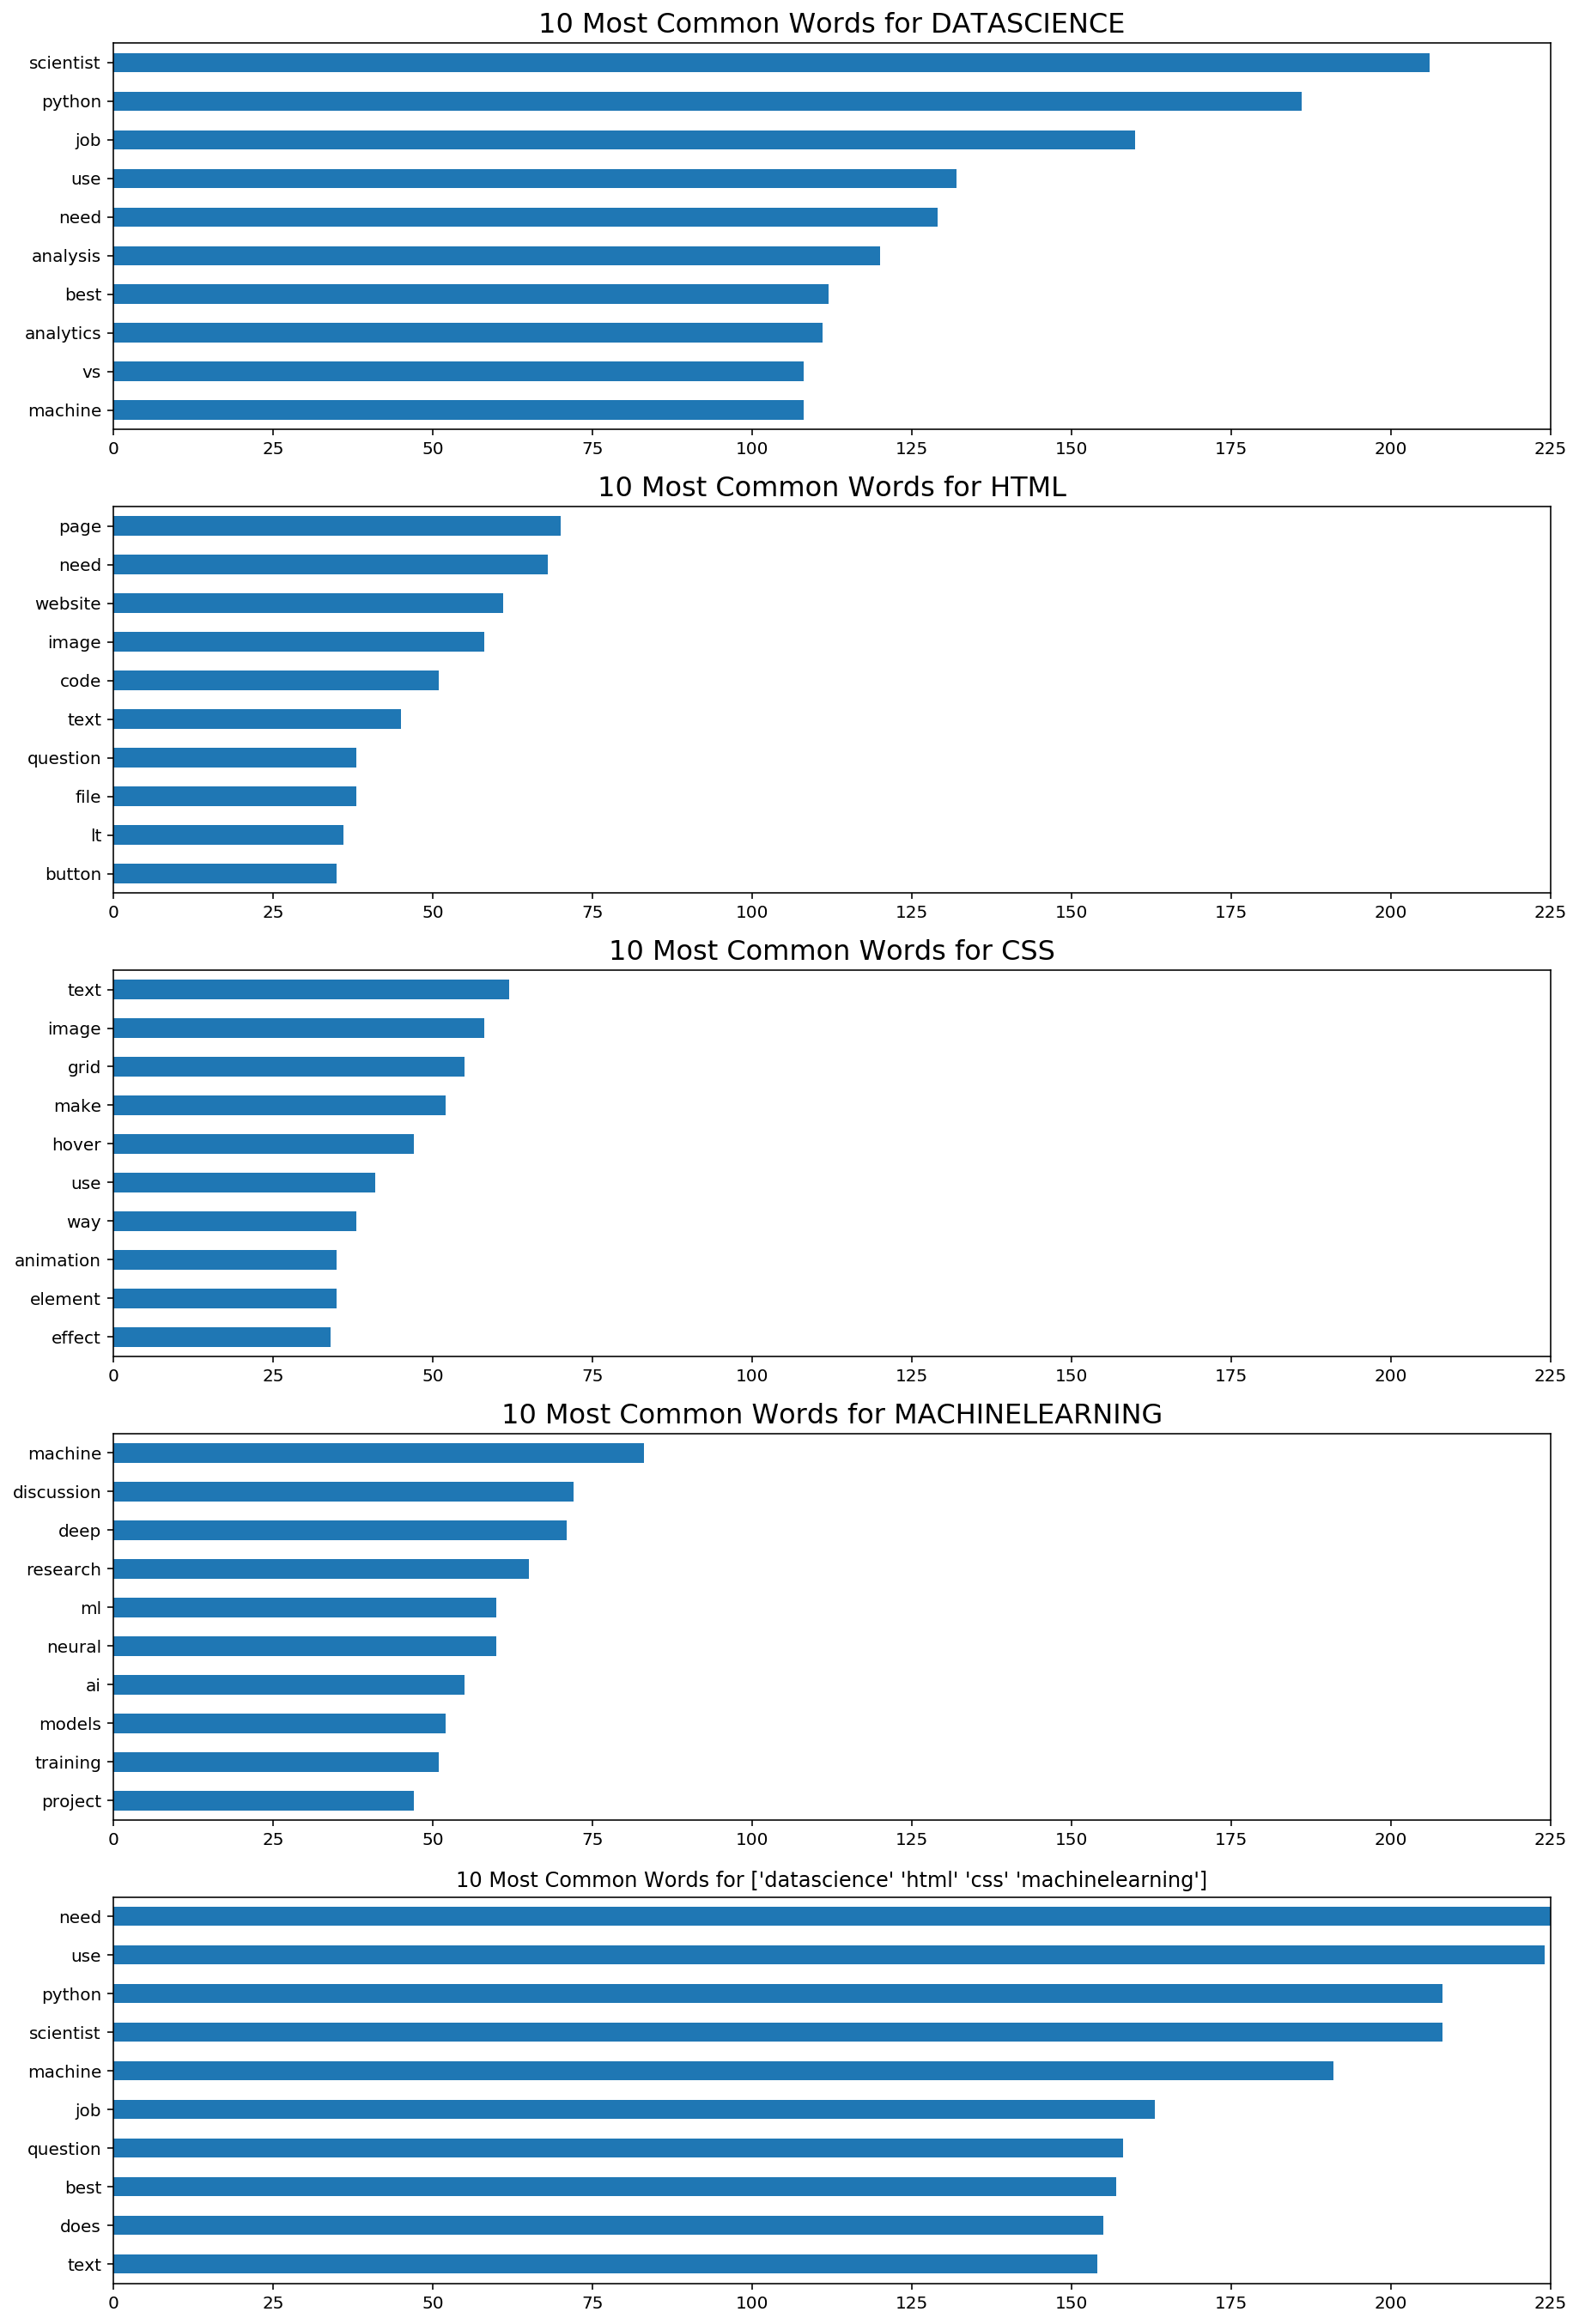

In [116]:
plot_most_common(df, features_df, num_features=10, standardize=True, include_combined=True)

## Feature Importance Coefficients

In [ ]:
lr_feats = lr_grid.best_estimator_.named_steps['tfidf'].get_feature_names()

lr_catcher = lr_grid.best_estimator_.named_steps['lr']


plt.figure(figsize=(16, 12))
plt.title('Feature Importance (Coefficients)', fontsize=20)
plt.ylabel('Features', fontsize=18)
plt.xlabel('(Abs) Coefficients', fontsize=18)

coef_df = pd.DataFrame(lr_catcher.coef_, columns=lr_feats).T
coef_df['abs_coef'] = coef_df[0].abs()
coef_df.sort_values('abs_coef', ascending=False)[0].head(15).plot(kind='barh');

# coef_kill = coef_df.sort_values('abs_coef', ascending=False)[0].head(500).index

# coef_kill


# my_stops.extend(coef_kill)

## ToDo for this section

1. make each of these functions only take two 

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
df[base_common.index].sum().plot.barh(ax=ax1, title='Science', color='navy')
ax1.set_xlim(0,2800)
ax2.set_xlim(0,2800)
tech[base_common.index].sum().plot.barh(ax=ax2, title='Technology', color='orange');

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))


groups = features.groupby(df['subreddit']).sum()[base_common.index].T.head(20)
plt.title('20 Most Common Words', fontsize=20)

groups.plot.bar(
                ax=ax,
                width=.8,
                # set style for colors instead of have to choose individually
                color=['gray','navy','orange','purple','red'],
                fontsize=15,
                );

# Word Clouds!!!

### Entire dataset

In [ ]:
make_cloud(X)

In [ ]:
fig = plt.figure(figsize=(14, 6*len(trimmed_list)))
for i, sub in enumerate(trimmed_list):
    ax = fig.add_subplot(len(trimmed_list),1,i+1)
    cloud = make_cloud(X=df[df['subreddit'] == sub]['title'])
    

    ax.set_title(topic.upper(), fontdict={'fontsize': 24})
    ax.imshow(cloud)
    ax.axis('off')


## To Do for this section

1. Confusion Matrix for all selected Topics
2. Make a function that will compare all topics in 1x1 fasion, find combinatorics or whatever Python library
3. Output each of the comparisons if a list of more than 2.

## Confusion Matrix

In [ ]:
lr_predictions = lr_grid.predict(X_test)

In [ ]:
lr_cm = confusion_matrix(y_test, lr_predictions)

In [ ]:
lr_confusion_df = pd.DataFrame(lr_cm, columns=topics, index=topics)

lr_confusion_df

In [ ]:
tn, fp, fn, tp = lr_cm.ravel()

### Specificity

In [ ]:
lr_spec = tn / (tn + fp)
lr_spec

### Sensitivity/Recall

In [ ]:
lr_sens = tp / (tp +fn)
lr_sens

### ROC AUC Score

In [ ]:
lr_auc = roc_auc_score(y_test, lr_predictions)
lr_auc

### ROC AUC Curve

In [ ]:
lr_probs = lr_grid.predict_proba(X_test)[:,1]

In [ ]:
# not multiclass
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_probs)

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(lr_fpr, lr_tpr, label=f'ROC curve (area = {lr_auc})', color='r', marker='D')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)', size=16)
plt.ylabel('True Positive Rate (Sensitivity)', size=16)
plt.title('ROC Curve Logistic Regression', size=20)
plt.legend(fontsize=14);

# Histograms!

In [ ]:
# Create figure.
plt.figure(figsize = (10,7))

# Create histogram of observations.
plt.hist(lr_probs, bins=25, color='b')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18);

In [ ]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
hst0 = plt.hist(lr_probs[y_test == 0],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Technology',)

hst1 = plt.hist(lr_probs[y_test == 1],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Science')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x=0.5,
           ymin = 0,
           ymax = max(hst1[0].max(), hst0[0].max()), # Max of the two highest respective hist values
           color='r',
           linestyle = '--')

# Label axes.
plt.title('Distribution of P(Science)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability', fontsize=18)

# Create legend.
plt.legend(fontsize=20);

# Thanks to Matt Brems for the colorful graphs! :)